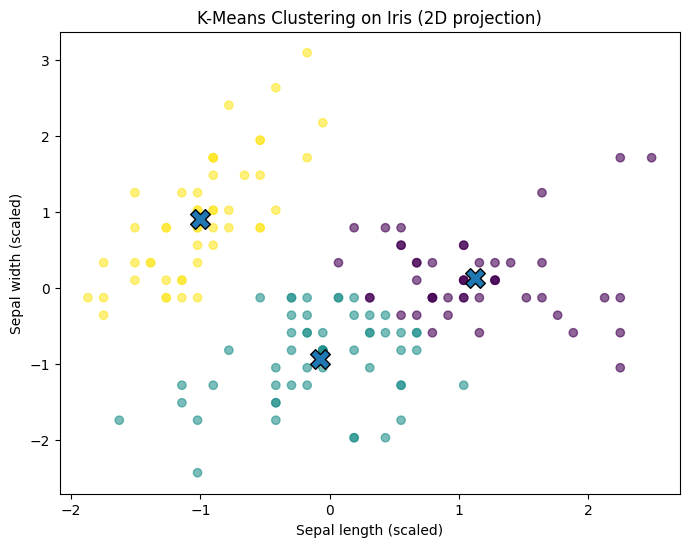

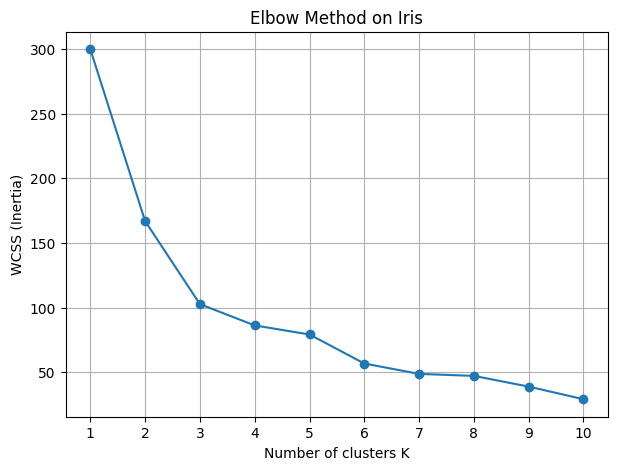

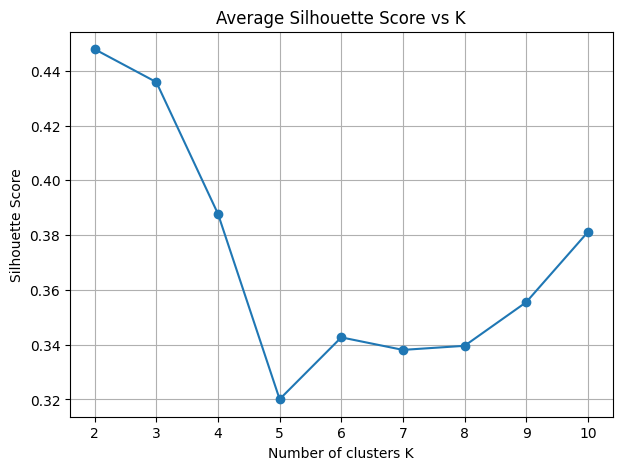

In [7]:
## 3‑cluster K‑Means model on iris dataset

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# 1. Load the Iris dataset 
iris = load_iris()
X = iris.data[:, :2]  # sepal length and sepal width (only the first two features for 2D plotting)

# 2. Scale features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_scaled)

# Retrieve the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 4. Plotting
plt.figure(figsize=(8, 6))
# Scatter plot: points colored by their assigned cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, alpha=0.6)
# Centroids shown as 'X' markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, edgecolor='k')

# Labels and title
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('K-Means Clustering on Iris (2D projection)')
plt.show()


# # --- 1. Inertia for K=3 (baseline from earlier) ---
inertia_k3 = kmeans.inertia_


# --- 2. Elbow Method: run K=1..10, capture inertia ---
ks = list(range(1, 11))
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertias.append(km.inertia_)
    # Silhouette only defined for k >= 2
    if k > 1:
        sil_scores.append(silhouette_score(X_scaled, km.labels_))
    else:
        sil_scores.append(float('nan'))

# Create a DataFrame for display
df = pd.DataFrame({'K': ks, 'WCSS (Inertia)': inertias,
                   'Silhouette Score': sil_scores})


# --- 3. Plot Elbow curve ---
plt.figure(figsize=(7,5))
plt.plot(ks, inertias, marker='o')
plt.xticks(ks)
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method on Iris')
plt.grid(True)
plt.show()

# --- 4. Plot Silhouette scores ---
plt.figure(figsize=(7,5))
plt.plot(ks[1:], sil_scores[1:], marker='o')
plt.xticks(ks[1:])
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Average Silhouette Score vs K')
plt.grid(True)
plt.show()